### <font color=red>Fill in your personal data below

#### <font color=blue>Name: Julius Chan <font color=black>

### <font color=red> Declaration of Originality

#### I declare that I am the originator of this work and that all other original sources used in this work have been appropriately acknowledged.

#### I understand that plagiarism is the act of taking and using the whole or any part of another person’s work and presenting it as my own without proper acknowledgement.

#### I understand that allowing someone else to copy my work and submit it as their own is also considered as plagiarism.

#### I also understand that plagiarism is an academic offence and that disciplinary action will be taken for plagiarism.”

#### Please sign your name or insert a picture of your signature in the markdown cell below. (double click on the cell)


#### 1. This deliverable is worth 60% of the final marks for DSES. The total marks for it is 60 marks. The due date is  <font color=red>15 Aug 2021 11:59 pm.
#### 2. This is an individual deliverable. You are required to produce your own work.
#### 3. You are allowed to use packages (libraries) not covered in the lecture slides or practicalsbject (e.g. scikit-learn, seaborn, etc.)
#### 4. Apart from using Markdown cells to include your description, take-aways, and comments, provide sufficient comments to your codes too. 
#### 5. Name your notebook according to the following format. 
>If you are from Group 1 and your student ID is 2100001A, then rename this notebook to
>YourName_Group1_2100001A_Assignment
#### 6. You need to submit your deliverable, i.e. this Jupyter Notebook in two different formats (ipynb and html).
>1. html format is for plagiarism check
>2. ipynb format is for marking

#### <font color= red><i> Run the following codes to generate your own subset of data for this report.

In [15]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#replace the path with your own
file=r"Project_Dataset.csv"
full_data=pd.read_csv(file, delimiter=",") #this is the full set
your_admn=input("Enter the last 4 digits of your admin no.: ")
your_group=int(input("Enter the last digit of your class group: "))
if your_group!=1:
    your_seed=int(str(your_group-1)+your_admn)
else:
    your_seed=int(str(your_group)+your_admn)
    your_data=full_data.iloc[your_seed-10000: your_seed,:]  #generate your own set for use
#From this step onwards you can commence your project with your_data.
#check that you have 1000 rows by 25 columns
your_data.shape

Enter the last 4 digits of your admin no.: 2753
Enter the last digit of your class group: 1


(10000, 25)

In [16]:
defaulters = your_data

# <font color= maroon> Project Background & Aims 

## Attribute Name	
Data Dictionary
- ID	Customer ID
- LIMIT	Total credit limit granted to the cards held by the client
- SEX	Gender of the client
  (F: Female; M: Male)
- EDU	Highest education level of the client 
- (1: Post-grad; 2: Degree; 3: High school; 0: Others)
- MARITAL	Marital status of the client
- (1: Single, 2: Married, 3: Others)
- STATUS(X+1)	The payment status at the Xth month.
- E.g. STATUS2 is the payment status of credit card bill of the 1st month.  
- (-1 = Punctual; 0: Min sum payment; Y = Delayed payment for Y month(s))
- BILLX	Bill amount at the end of Xth month
- PAYX	Amount paid at the end of Xth month
- DEFAULT	If the client has defaulted payment at 7th month
- (1: Yes; 0: No)

### Aims
- Determine the type of bank clients who are likely to default on their credit card payments.
- Find a prediction of credit card default from bank clients through correlation analysis. 
- To keep track of bank clients' payment intervals and come up with a solution for those who default their payment.

In [17]:
defaulters.head() #visually inspect the dataframe

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
2753,2754.0,30000.0,F,2.0,2.0,22.0,0.0,0.0,0.0,2.0,...,28392.0,22612.0,22750.0,2000.0,1800.0,0.0,1000.0,1000.0,0.0,1.0
2754,2755.0,20000.0,M,1.0,2.0,22.0,0.0,0.0,0.0,0.0,...,5751.0,6500.0,7386.0,1100.0,1100.0,500.0,1000.0,1000.0,1000.0,0.0
2755,2756.0,240000.0,F,2.0,2.0,25.0,0.0,0.0,0.0,0.0,...,186275.0,190337.0,193961.0,6500.0,7000.0,6680.0,7070.0,6954.0,14870.0,0.0
2756,2757.0,200000.0,M,2.0,1.0,31.0,7.0,6.0,5.0,4.0,...,217600.0,208432.0,200057.0,0.0,328.0,0.0,0.0,600.0,2500.0,1.0
2757,2758.0,70000.0,M,2.0,2.0,38.0,0.0,0.0,2.0,0.0,...,30148.0,29918.0,29399.0,5600.0,0.0,1500.0,1057.0,2000.0,1035.0,0.0


In [18]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 2753 to 12752
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         10000 non-null  float64
 1   LIMIT      10000 non-null  float64
 2   SEX        10000 non-null  object 
 3   EDUCATION  9997 non-null   float64
 4   MARITAL    9984 non-null   float64
 5   AGE        10000 non-null  float64
 6   STATUS2    10000 non-null  float64
 7   STATUS3    10000 non-null  float64
 8   STATUS4    10000 non-null  float64
 9   STATUS5    10000 non-null  float64
 10  STATUS6    10000 non-null  float64
 11  STATUS7    10000 non-null  float64
 12  BILL1      10000 non-null  float64
 13  BILL2      10000 non-null  float64
 14  BILL3      10000 non-null  float64
 15  BILL4      10000 non-null  float64
 16  BILL5      10000 non-null  float64
 17  BILL6      10000 non-null  float64
 18  PAY1       10000 non-null  float64
 19  PAY2       10000 non-null  float64
 20  PAY

In [19]:
defaulters.dtypes

ID           float64
LIMIT        float64
SEX           object
EDUCATION    float64
MARITAL      float64
AGE          float64
STATUS2      float64
STATUS3      float64
STATUS4      float64
STATUS5      float64
STATUS6      float64
STATUS7      float64
BILL1        float64
BILL2        float64
BILL3        float64
BILL4        float64
BILL5        float64
BILL6        float64
PAY1         float64
PAY2         float64
PAY3         float64
PAY4         float64
PAY5         float64
PAY6         float64
DEFAULT      float64
dtype: object

In [20]:
defaulters.describe() 

,ID,LIMIT,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
count,10000.00000,10000.000000,9997.000000,9984.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7753.50000,166330.368000,1.762729,1.565004,35.845900,0.159900,0.098300,0.092900,0.03430,0.030300,...,39868.964200,38690.971500,37221.960500,5656.461900,5.894820e+03,4479.437500,4646.304600,4827.422200,5265.642200,0.224500
std,2886.89568,130529.672867,0.717443,0.519268,23.447156,0.960533,0.985055,0.970136,0.88329,0.866751,...,59445.460187,58035.958522,57344.294983,16010.858919,2.452369e+04,13505.842382,14665.054207,15183.869053,17536.863114,0.417273
min,2754.00000,10000.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-170000.000000,-23003.000000,-51443.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5253.75000,50000.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1930.000000,1450.000000,959.500000,876.750000,6.287500e+02,276.750000,200.000000,181.000000,0.000000,0.000000
50%,7753.50000,140000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,18428.000000,17394.500000,16074.500000,2100.000000,2.000000e+03,1491.500000,1500.000000,1500.000000,1367.500000,0.000000
75%,10253.25000,240000.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,49343.500000,48978.750000,47702.250000,5004.250000,5.000000e+03,4000.000000,4000.000000,4086.000000,4000.000000,0.000000
max,12753.00000,750000.000000,3.000000,3.000000,999.000000,8.000000,8.000000,8.000000,8.00000,8.000000,...,569034.000000,551702.000000,568638.000000,505000.000000,1.684259e+06,417588.000000,497000.000000,388071.000000,403500.000000,1.000000


## <font color= grey> Data Understanding 

### Take-away 1

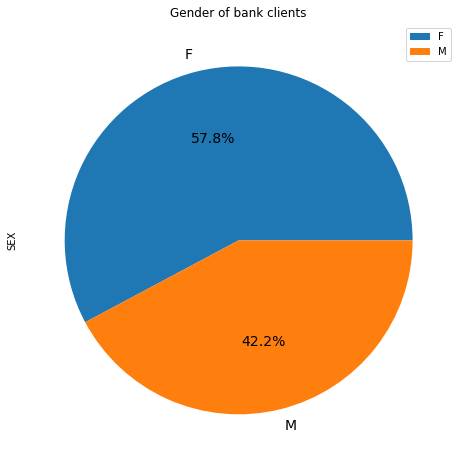

In [21]:
defaulters.groupby('SEX')['SEX'].count().\
plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), fontsize=14)

plt.title('Gender of bank clients')
plt.legend(loc='upper right')
plt.show()


The piechart shows that there are more female clients than male clients.

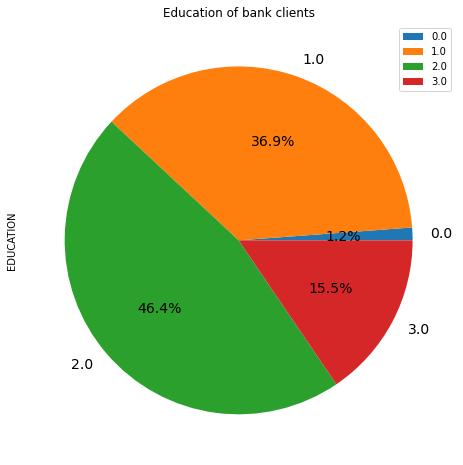

In [22]:
defaulters.groupby('EDUCATION')['EDUCATION'].count().\
plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), fontsize=14)
plt.title('Education of bank clients')
plt.legend(loc='upper right')
plt.show()

The pie chart shows most of the bank clients has a degree in education level.

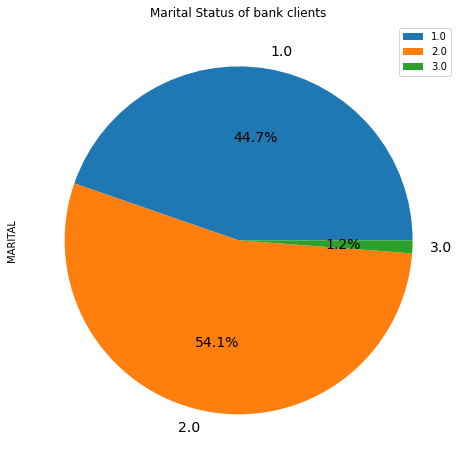

In [23]:
defaulters.groupby('MARITAL')['MARITAL'].count().\
plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), fontsize=14)

plt.title('Marital Status of bank clients')
plt.legend(loc='upper right')
plt.show()


The pie chart shows that most of the bank clients marital status is single.

### Take-away 2

Text(0.5, 0, 'Payment')

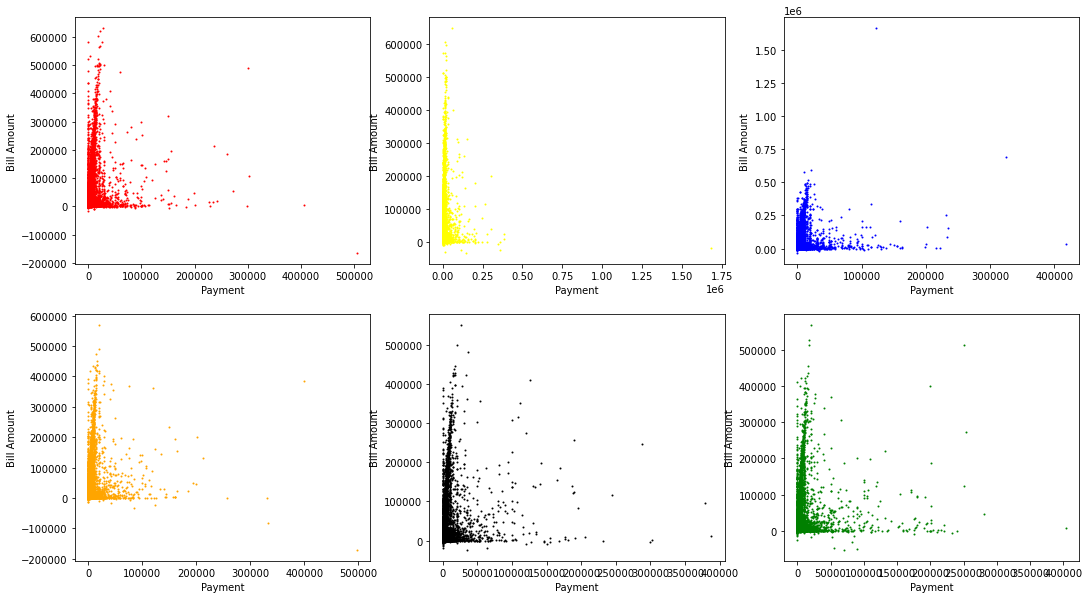

In [24]:
plt.subplots(figsize=(18,10))

plt.subplot(231)
plt.scatter(x=defaulters.PAY1, y=defaulters.BILL1, color='red', s=1)
plt.ylabel("Bill Amount", fontsize=10)
plt.xlabel("Payment", fontsize=10)

plt.subplot(232)
plt.scatter(x=defaulters.PAY2, y=defaulters.BILL2, color='yellow', s=1)
plt.ylabel("Bill Amount", fontsize=10)
plt.xlabel("Payment", fontsize=10)

plt.subplot(233)
plt.scatter(x=defaulters.PAY3, y=defaulters.BILL3, color='blue', s=1)
plt.ylabel("Bill Amount", fontsize=10)
plt.xlabel("Payment", fontsize=10)

plt.subplot(234)
plt.scatter(x=defaulters.PAY4, y=defaulters.BILL4, color='orange', s=1)
plt.ylabel("Bill Amount", fontsize=10)
plt.xlabel("Payment", fontsize=10)

plt.subplot(235)
plt.scatter(x=defaulters.PAY5, y=defaulters.BILL5, color='black', s=1)
plt.ylabel("Bill Amount", fontsize=10)
plt.xlabel("Payment", fontsize=10)

plt.subplot(236)
plt.scatter(x=defaulters.PAY6, y=defaulters.BILL6, color='green', s=1)
plt.ylabel("Bill Amount", fontsize=10)
plt.xlabel("Payment", fontsize=10)



As seen in the scatterplot, the monthly bill amount for the past six months appears to be quite high while bank client's payment for the bill amount appears to be low.

### Take-away 3

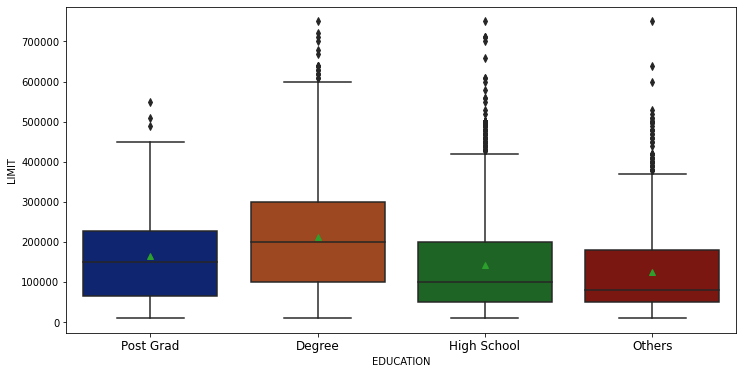

In [28]:
import seaborn as sns
plt.figure(figsize=(12,6))


sns.boxplot(x = "EDUCATION", y = "LIMIT", data = defaulters, palette = 'dark', showmeans=True)

plt.xticks([0,1,2,3],['Post Grad','Degree','High School','Others'], fontsize = 12)

plt.show()

As seen in this box plot, bank clients that has a degree in education have a greater average credit limit than those with other education.

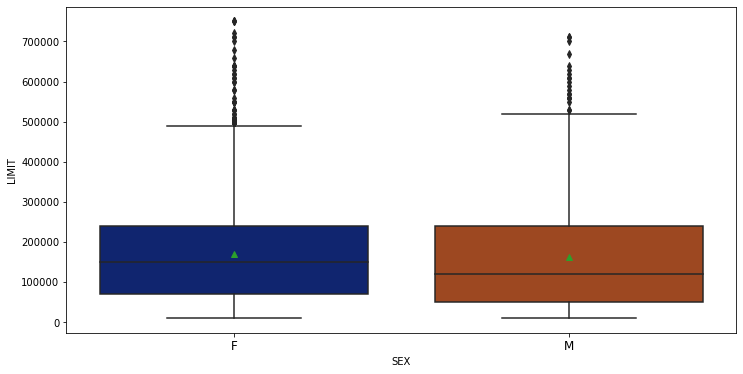

In [29]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT", data = defaulters, palette = 'dark', showmeans=True)

plt.xticks([0,1],['F', 'M'], fontsize = 12)

plt.show()

As seen in this box plot, male clients have a greater average of credit limit compared to female clients. 

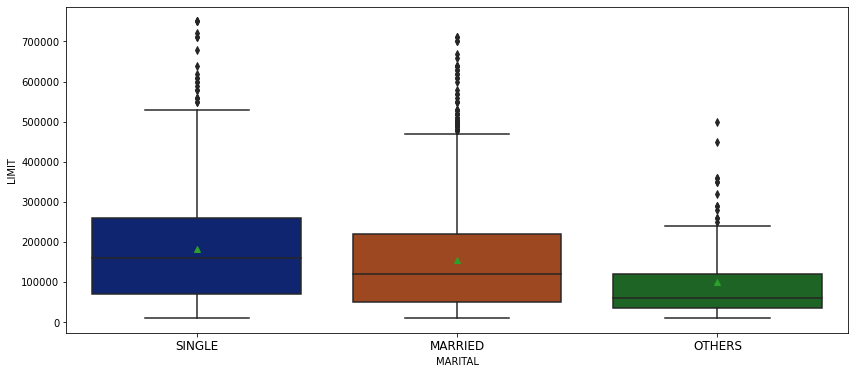

In [30]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARITAL", y = "LIMIT", data = defaulters, palette = 'dark', showmeans=True)

plt.xticks([0,1,2],['SINGLE','MARRIED','OTHERS'], fontsize = 12)

plt.show()

As seen in this box plot, bank clients who are single have a greater average of credit limit than those who are married.

### Take-away 4

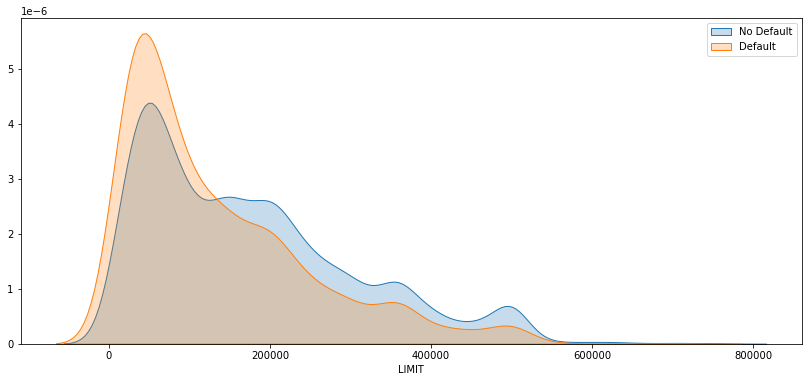

In [31]:
plt.figure(figsize=(14,6)) #univariate distribution

sns.kdeplot(your_data.loc[(defaulters['DEFAULT'] == 0), 'LIMIT'], label = 'No Default', shade = True)
sns.kdeplot(your_data.loc[(defaulters['DEFAULT'] ==1), 'LIMIT'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.legend()
plt.show()


As seen in the kernel distribution estimation plot, most of the bank clients who defaulted their payment falls under the 0 - 100000 credit limit range.

### Take-away 5

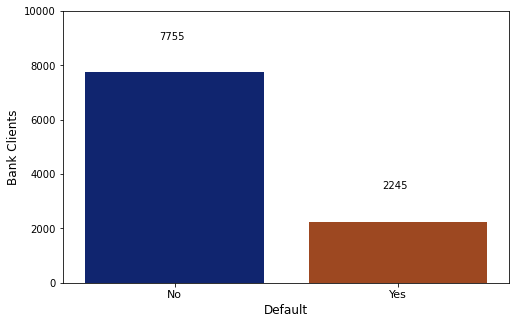

In [32]:
import seaborn as sns
plt.figure(figsize=(8,5))

ax = sns.countplot(x="DEFAULT", data= your_data, palette ='dark')
plt.xlabel("Default", fontsize= 12)
plt.ylabel("Bank Clients", fontsize= 12)
plt.ylim(0,10000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for count in ax.patches:
    ax.annotate((count.get_height()), (count.get_x()+0.33, count.get_height()+1200))
    
plt.show()

As shown in the bar chart, most of the bank clients do not default on their payments at the seventh month

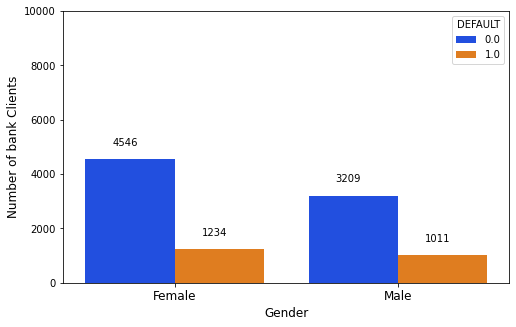

In [33]:

plt.figure(figsize=(8,5))

ax = sns.countplot(data = your_data, x = 'SEX', hue="DEFAULT", palette = 'bright')

plt.xlabel("Gender", fontsize= 12)
plt.ylabel("Number of bank Clients", fontsize= 12)
plt.ylim(0,10000)
plt.xticks([0,1],['Female', 'Male'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

As shown in the barchart, most of the bank clients who default their payment are male.

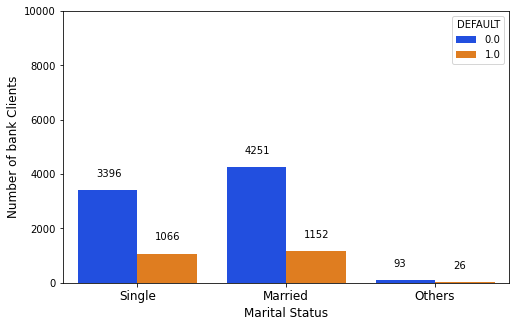

In [34]:

plt.figure(figsize=(8,5))

ax = sns.countplot(data = your_data , x = 'MARITAL', hue="DEFAULT", palette = 'bright')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("Number of bank Clients", fontsize= 12)
plt.ylim(0,10000)
plt.xticks([0,1,2],['Single', 'Married', 'Others'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

As shown in the bar chart, bank clients who are single tend to have higher probability of defaulting while the married ones have a lower probability of defaulting. The 'Others' category has a lower chance of defaulting due to the number of clients placed under that category.

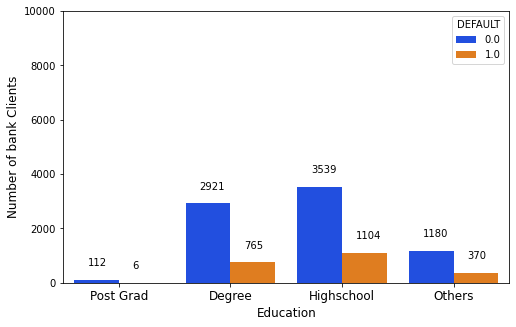

In [35]:
plt.figure(figsize=(8,5))

ax = sns.countplot(data = your_data, x = 'EDUCATION', hue="DEFAULT", palette = 'bright')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("Number of bank Clients", fontsize= 12)
plt.ylim(0,10000)
plt.xticks([0,1,2,3],['Post Grad', 'Degree', 'Highschool', 'Others'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

As shown in the bar chart, bank clients who are still in highschool tend to have higher probability of defaulting.

# <font color= maroon>  Data Preparation 

- Bar chart has been plot to identify the missing values. 

- Outliers can be found under 'AGE' as the minimum is -1 and maximum is 999. 

- Missing values can be found under 'EDUCATION'.

- Missing values can be found under 'MARITAL'.


## <font color= grey> Data Transformation

In [36]:
print(defaulters.info(), '\n') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 2753 to 12752
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         10000 non-null  float64
 1   LIMIT      10000 non-null  float64
 2   SEX        10000 non-null  object 
 3   EDUCATION  9997 non-null   float64
 4   MARITAL    9984 non-null   float64
 5   AGE        10000 non-null  float64
 6   STATUS2    10000 non-null  float64
 7   STATUS3    10000 non-null  float64
 8   STATUS4    10000 non-null  float64
 9   STATUS5    10000 non-null  float64
 10  STATUS6    10000 non-null  float64
 11  STATUS7    10000 non-null  float64
 12  BILL1      10000 non-null  float64
 13  BILL2      10000 non-null  float64
 14  BILL3      10000 non-null  float64
 15  BILL4      10000 non-null  float64
 16  BILL5      10000 non-null  float64
 17  BILL6      10000 non-null  float64
 18  PAY1       10000 non-null  float64
 19  PAY2       10000 non-null  float64
 20  PAY

In [37]:
print(defaulters.isna().sum()) #Find any missing values

ID            0
LIMIT         0
SEX           0
EDUCATION     3
MARITAL      16
AGE           0
STATUS2       0
STATUS3       0
STATUS4       0
STATUS5       0
STATUS6       0
STATUS7       0
BILL1         0
BILL2         0
BILL3         0
BILL4         0
BILL5         0
BILL6         0
PAY1          0
PAY2          0
PAY3          0
PAY4          0
PAY5          0
PAY6          0
DEFAULT       0
dtype: int64


In [38]:
defaulters.MARITAL.unique() #Find Unique Values in MARITAL column

array([ 2.,  1.,  3., nan])

In [39]:
defaulters.EDUCATION.unique() #Find Unique Values in MARITAL column

array([ 2.,  1.,  3.,  0., nan])

In [40]:
defaulters.describe() #Age has outliers

,ID,LIMIT,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
count,10000.00000,10000.000000,9997.000000,9984.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7753.50000,166330.368000,1.762729,1.565004,35.845900,0.159900,0.098300,0.092900,0.03430,0.030300,...,39868.964200,38690.971500,37221.960500,5656.461900,5.894820e+03,4479.437500,4646.304600,4827.422200,5265.642200,0.224500
std,2886.89568,130529.672867,0.717443,0.519268,23.447156,0.960533,0.985055,0.970136,0.88329,0.866751,...,59445.460187,58035.958522,57344.294983,16010.858919,2.452369e+04,13505.842382,14665.054207,15183.869053,17536.863114,0.417273
min,2754.00000,10000.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-170000.000000,-23003.000000,-51443.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5253.75000,50000.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1930.000000,1450.000000,959.500000,876.750000,6.287500e+02,276.750000,200.000000,181.000000,0.000000,0.000000
50%,7753.50000,140000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,18428.000000,17394.500000,16074.500000,2100.000000,2.000000e+03,1491.500000,1500.000000,1500.000000,1367.500000,0.000000
75%,10253.25000,240000.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,49343.500000,48978.750000,47702.250000,5004.250000,5.000000e+03,4000.000000,4000.000000,4086.000000,4000.000000,0.000000
max,12753.00000,750000.000000,3.000000,3.000000,999.000000,8.000000,8.000000,8.000000,8.00000,8.000000,...,569034.000000,551702.000000,568638.000000,505000.000000,1.684259e+06,417588.000000,497000.000000,388071.000000,403500.000000,1.000000


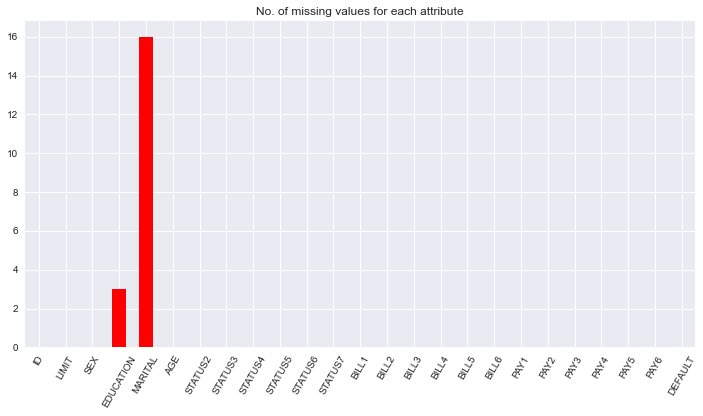

In [41]:
defaulters_missing=defaulters.isna().sum() #Plot the number of missing values in  a bar graph
plt.style.use('seaborn')
defaulters_missing.plot.bar(title='No. of missing values for each attribute', \
                            figsize =(12,6), rot=60, grid=True, color='red' )
plt.show()

### Tranformation 1

#### Target Attribute : Education
 - With the exception of the missing value, there are only four unique values.
 - The mode is easily found for the attribute so it can be used as a simple way for inputing missing value

In [42]:
defaulters.EDUCATION.isna().sum() # Missing 3 values

3

In [43]:
defaulters.EDUCATION.value_counts() 

2.0    4643
1.0    3686
3.0    1550
0.0     118
Name: EDUCATION, dtype: int64

In [44]:
#find the mode of 'EDUCATION' and assigned to a var
most_EDUCATION = your_data.EDUCATION.value_counts().index[0]
most_EDUCATION

2.0

In [45]:
#fillna (most_EDUCATION)
defaulters[['EDUCATION']] = your_data.EDUCATION.fillna(most_EDUCATION)

In [46]:
#To check if there any missing values for 'Education' column
defaulters_missing=defaulters.isna().sum()
defaulters_missing

ID            0
LIMIT         0
SEX           0
EDUCATION     0
MARITAL      16
AGE           0
STATUS2       0
STATUS3       0
STATUS4       0
STATUS5       0
STATUS6       0
STATUS7       0
BILL1         0
BILL2         0
BILL3         0
BILL4         0
BILL5         0
BILL6         0
PAY1          0
PAY2          0
PAY3          0
PAY4          0
PAY5          0
PAY6          0
DEFAULT       0
dtype: int64

#### Target Attribute : Marital
 - With the exception of the missing value, there are only three unique values.
 - The mode is easily found for the attribute so it can be used as a simple way for inputing missing value

In [47]:
defaulters.MARITAL.isna().sum() #Missing 16 Values

16

In [48]:
defaulters.MARITAL.value_counts()  

2.0    5403
1.0    4462
3.0     119
Name: MARITAL, dtype: int64

In [49]:
#find the mode of 'MARITAL' and assigned to a var
most_MARITAL = your_data.MARITAL.value_counts().index[0]
most_MARITAL

2.0

In [50]:
#fillna (most_MARITAL)
defaulters[['MARITAL']] = your_data.MARITAL.fillna(most_MARITAL)

In [51]:
#To check if there any missing values for 'Education' column
defaulters_missing=defaulters.isna().sum()
defaulters_missing

ID           0
LIMIT        0
SEX          0
EDUCATION    0
MARITAL      0
AGE          0
STATUS2      0
STATUS3      0
STATUS4      0
STATUS5      0
STATUS6      0
STATUS7      0
BILL1        0
BILL2        0
BILL3        0
BILL4        0
BILL5        0
BILL6        0
PAY1         0
PAY2         0
PAY3         0
PAY4         0
PAY5         0
PAY6         0
DEFAULT      0
dtype: int64

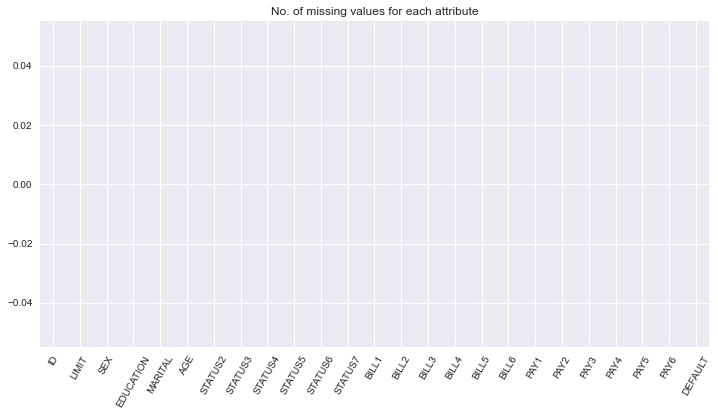

In [52]:
defaulters_missing=defaulters.isna().sum() #Plot the number of missing values in  a bar graph
plt.style.use('seaborn')
defaulters_missing.plot.bar(title='No. of missing values for each attribute', \
                            figsize =(12,6), rot=60, grid=True, color='red' )
plt.show()

### Transformation 3

#### Target Attribute : Age
- Age -1 and 999 doesn't make any sense which is incorrectly recorded as an outlier thus need to be removed.
- Age with the range of -1 and 999 and above has been deleted from the dataset.

In [53]:
index = defaulters[(defaulters['AGE'] >= 999)|(defaulters['AGE'] <= -1)].index
defaulters.drop(index, inplace=True)

In [54]:
defaulters['AGE'].describe() #Check if there are anymore outliers

count    9993.000000
mean       35.371360
std         9.244082
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        73.000000
Name: AGE, dtype: float64

## <font color= grey> Correlation Analysis

- STATUS 2 to STATUS 7 are positvely correlated with each other.
- BILL 1 to BILL 6 are positvely correlated with each other.
- Limit seems to have a positive correlation with BILL1 to BILL6 & PAY1 to PAY6 which might means that bank clients tend to have higher bill amount & payment when their credit limit is high.
- Default seems to have a positive correlation with STATUS2 to STATUS7 as the payment status impacts whether a bank client will default payment at the seventh month
- ID column should be drop as it has a weak correlation with other data.

In [55]:
corr=your_data.corr()

In [56]:
corr.style.background_gradient(cmap='Reds')

,ID,LIMIT,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,STATUS7,BILL1,BILL2,BILL3,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
ID,1.000000,-0.002775,-0.010711,-0.001108,-0.004985,-0.003545,0.005650,-0.000262,-0.003514,0.004166,0.012348,-0.013602,-0.012669,-0.016925,-0.011164,-0.011018,-0.010114,0.000882,-0.009041,0.006863,-0.000397,-0.002014,-0.008462,-0.000585
LIMIT,-0.002775,1.000000,-0.250587,-0.114358,0.149756,-0.202116,-0.241950,-0.246240,-0.218632,-0.211995,-0.217873,0.261529,0.256031,0.263947,0.276175,0.267896,0.262017,0.199111,0.184913,0.229260,0.209750,0.212197,0.240283,-0.128373
EDUCATION,-0.010711,-0.250587,1.000000,-0.136094,0.180103,0.114839,0.122599,0.114590,0.093228,0.087526,0.084126,-0.011058,-0.010875,-0.018782,-0.026692,-0.018637,-0.013976,-0.046166,-0.044094,-0.067903,-0.036741,-0.046441,-0.068257,0.042053
MARITAL,-0.001108,-0.114358,-0.136094,1.000000,-0.417523,0.006000,0.015701,0.015255,0.015497,0.015263,0.024475,-0.023839,-0.026815,-0.031322,-0.030849,-0.034507,-0.025147,-0.036960,-0.023236,-0.019822,-0.023953,0.004860,-0.007412,-0.029756
AGE,-0.004985,0.149756,0.180103,-0.417523,1.000000,-0.021807,-0.046365,-0.045036,-0.041725,-0.045769,-0.053753,0.049496,0.046845,0.042302,0.035196,0.036175,0.037713,0.030528,0.021447,0.037977,0.039875,0.034378,0.019364,-0.000284
STATUS2,-0.003545,-0.202116,0.114839,0.006000,-0.021807,1.000000,0.703506,0.539499,0.501565,0.459399,0.410858,0.132323,0.137058,0.131626,0.137420,0.139841,0.137004,-0.091592,-0.053626,-0.075378,-0.069700,-0.044799,-0.058533,0.307735
STATUS3,0.005650,-0.241950,0.122599,0.015701,-0.046365,0.703506,1.000000,0.673699,0.573823,0.525717,0.461963,0.157535,0.156584,0.151831,0.158123,0.161201,0.158764,-0.134367,-0.060321,-0.080840,-0.064571,-0.037310,-0.053984,0.276766
STATUS4,-0.000262,-0.246240,0.114590,0.015255,-0.045036,0.539499,0.673699,1.000000,0.704270,0.595145,0.527176,0.111315,0.133505,0.120804,0.135703,0.140351,0.140049,-0.038739,-0.110527,-0.083502,-0.064852,-0.050223,-0.057587,0.253120
STATUS5,-0.003514,-0.218632,0.093228,0.015497,-0.041725,0.501565,0.573823,0.704270,1.000000,0.748202,0.610092,0.120046,0.134321,0.149146,0.164757,0.165224,0.165553,-0.050930,-0.033613,-0.130883,-0.079493,-0.057916,-0.045741,0.236714
STATUS6,0.004166,-0.211995,0.087526,0.015263,-0.045769,0.459399,0.525717,0.595145,0.748202,1.000000,0.709995,0.111138,0.121257,0.138019,0.172731,0.167294,0.168397,-0.057504,-0.029896,-0.038021,-0.135913,-0.061159,-0.060211,0.225733


In [57]:
corr_mat=your_data.drop(columns=['ID']).corr()

<AxesSubplot:>

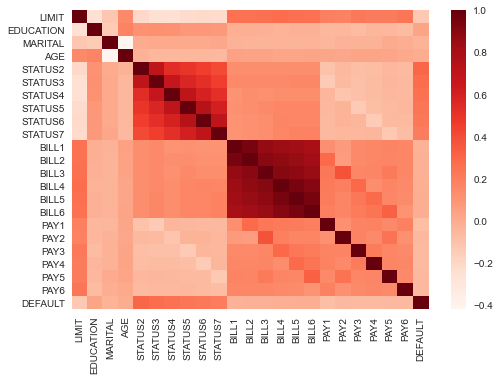

In [58]:
import seaborn as sns
sns.heatmap(corr_mat,cmap="Reds")

In [59]:
abs(corr_mat['LIMIT'])

LIMIT        1.000000
EDUCATION    0.250587
MARITAL      0.114358
AGE          0.149756
STATUS2      0.202116
STATUS3      0.241950
STATUS4      0.246240
STATUS5      0.218632
STATUS6      0.211995
STATUS7      0.217873
BILL1        0.261529
BILL2        0.256031
BILL3        0.263947
BILL4        0.276175
BILL5        0.267896
BILL6        0.262017
PAY1         0.199111
PAY2         0.184913
PAY3         0.229260
PAY4         0.209750
PAY5         0.212197
PAY6         0.240283
DEFAULT      0.128373
Name: LIMIT, dtype: float64

In [60]:
#Correlation with Target
cor_target=abs(corr_mat['LIMIT'])

#Selecting highly correlated attributes
relevant_features=cor_target[cor_target>0.2]
relevant_features

LIMIT        1.000000
EDUCATION    0.250587
STATUS2      0.202116
STATUS3      0.241950
STATUS4      0.246240
STATUS5      0.218632
STATUS6      0.211995
STATUS7      0.217873
BILL1        0.261529
BILL2        0.256031
BILL3        0.263947
BILL4        0.276175
BILL5        0.267896
BILL6        0.262017
PAY3         0.229260
PAY4         0.209750
PAY5         0.212197
PAY6         0.240283
Name: LIMIT, dtype: float64

# <font color= maroon> Data Modelling

 - LIMIT has been set at the dependent Variable as its a value that is quantitative and continuous, 
 - Education has a positive correlation with limit, this might indicate that the higher the education level, the higher the credit limit is.
 - A positive correlation exists between LIMIT and BILL. This might imply that the larger the bill amount, the higher the credit limit.
 - A positive correlation exists between LIMIT AND STATUS. This might imply that that clients payment status might affect the credit limit.
 - As some of the attributes may be highly correlated. This means that change in one attribute would cause change to another and so the accuracy might fluctuate significantly.
 - Overall linear regression score output: 0.21

## <font color= grey> Linear Regression

In [61]:
defaulters.head()

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
2753,2754.0,30000.0,F,2.0,2.0,22.0,0.0,0.0,0.0,2.0,...,28392.0,22612.0,22750.0,2000.0,1800.0,0.0,1000.0,1000.0,0.0,1.0
2754,2755.0,20000.0,M,1.0,2.0,22.0,0.0,0.0,0.0,0.0,...,5751.0,6500.0,7386.0,1100.0,1100.0,500.0,1000.0,1000.0,1000.0,0.0
2755,2756.0,240000.0,F,2.0,2.0,25.0,0.0,0.0,0.0,0.0,...,186275.0,190337.0,193961.0,6500.0,7000.0,6680.0,7070.0,6954.0,14870.0,0.0
2756,2757.0,200000.0,M,2.0,1.0,31.0,7.0,6.0,5.0,4.0,...,217600.0,208432.0,200057.0,0.0,328.0,0.0,0.0,600.0,2500.0,1.0
2757,2758.0,70000.0,M,2.0,2.0,38.0,0.0,0.0,2.0,0.0,...,30148.0,29918.0,29399.0,5600.0,0.0,1500.0,1057.0,2000.0,1035.0,0.0


In [62]:
defaulters.columns

Index(['ID', 'LIMIT', 'SEX', 'EDUCATION', 'MARITAL', 'AGE', 'STATUS2',
       'STATUS3', 'STATUS4', 'STATUS5', 'STATUS6', 'STATUS7', 'BILL1', 'BILL2',
       'BILL3', 'BILL4', 'BILL5', 'BILL6', 'PAY1', 'PAY2', 'PAY3', 'PAY4',
       'PAY5', 'PAY6', 'DEFAULT'],
      dtype='object')

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
#create into respective X and Y data to fit the model
Y=defaulters["LIMIT"] #Target, Labels, Y, Dependent Variable, Response
X=defaulters[["EDUCATION","BILL4","STATUS4"]] #Explanatory, Independent Variables, Predictors
#Note Nested List

In [65]:
#Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,shuffle=True)

In [66]:
x_train

,EDUCATION,BILL4,STATUS4
10918,2.0,118811.0,0.0
7387,3.0,20127.0,0.0
7687,1.0,11922.0,-1.0
2914,2.0,-6.0,-1.0
12331,1.0,1624.0,-1.0
...,...,...,...
3664,3.0,6712.0,2.0
10936,2.0,108476.0,2.0
5019,3.0,17059.0,2.0
7966,2.0,594.0,-1.0


In [67]:
#Import more libraries to calculate model performance
from sklearn.metrics import mean_squared_error, r2_score

#with sklearn, name our regression model my_regr
my_regr=linear_model.LinearRegression()
my_regr.fit(x_train, y_train) #train for each observation of train set

print ('Intercept: \n',my_regr.intercept_)
print ('Coefficients: \n', my_regr.coef_)

Intercept: 
 213266.10938995762
Coefficients: 
 [-3.95509641e+04  6.66732398e-01 -3.55331400e+04]


We are providing the labels, or ‘correct answer’ to teach the machine. y_train is the label for each row of x_train. The machine will learn what the characteristics of x_train are such that the y_train is of that certain value. 

In [68]:
#LIMIT = *EDUCATION + *BILl4 + *STATUS4

In [69]:
# make some prediction with the testing set
y_pred = my_regr.predict(x_test)

In [70]:
#check the performance with some metrics
print ('Mean Squared error: %.2f'
       %mean_squared_error(y_test, y_pred))

Mean Squared error: 13513264369.24


Provide the description, justification and results of your technique(s) here.

In [71]:
#The coefficient of determination 1 is the perfect prediction

#The coefficient of determination, r2, is similar to the correlation coefficient, r. 
#The correlation coefficient formula will tell you how strong of a linear relationship there is between two variables. 
#R Squared is the square of the correlation coefficient, r (hence the term r squared).

In [72]:
print ('Coefficient of determination: %.2f'
       %r2_score(y_test, y_pred))

Coefficient of determination: 0.19


In [73]:
import statsmodels.api as sm
#Use another package to provide the full summary of the model
x_train = sm.add_constant(x_train)
my_regr2=sm.OLS(y_train, x_train).fit() #OLS means ordinary least square

In [74]:
my_regr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LIMIT   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     689.3
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:26:47   Log-Likelihood:            -1.0461e+05
No. Observations:                7994   AIC:                         2.092e+05
Df Residuals:                    7990   BIC:                         2.093e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.133e+05   3612.452     59.036      0.000    2.06e+05     2.2e+05
EDUCATION  -3.955e+04   1833.714    -21.569      0.000   -4.31e+04    -3.6e+04
BILL4          0.6667      0.022     30.354      0.000       0.624       0.710
STATUS4    -3.553e+04   1369.083    -25.954      0.000   -3.82e+04   -3.28e+04
==============================================================================
Omnibus:                     1161.444   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1759.334
Skew:                           1.051   Prob(JB):                         0.00
Kurtosis:                       3.930   Cond. No.                     2.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
print('Parameters: ', my_regr2.params)

Parameters:  const        213266.109389
EDUCATION    -39550.964092
BILL4             0.666732
STATUS4      -35533.140041
dtype: float64


In [76]:
print('R2: ', my_regr2.rsquared)

R2:  0.2055999253788301


In [77]:
x_test = sm.add_constant(x_test)
y_pred2 = my_regr2.predict(x_test)

In [78]:
#check the performance with some metrics
print ('Mean Squared error: %.2f'
       %mean_squared_error(y_test, y_pred2))

Mean Squared error: 13513264369.24


In [79]:
print ('Coefficient of determination: %.2f'
       %r2_score(y_test, y_pred2))

Coefficient of determination: 0.19


## <font color= grey> Logistic Regression

- The data is based on why bank customers default payments.
- "Default" has been set as the Dependent Variable (Target) into y as its a qualiatative attribute.
- "DEFAULT", "ID" seems to be an unimportant feature.
- "SEX" has to be dropped as its a string attribute that cant be converted to "float".
- "SEX", "DEFAULT", "ID" has been dropped from the predictor (X) so it doesn't affect the accuracy score.
- STATUS 2 - 7 has a positive correlation with default as clients payment status gives strong indication on default.
- The Overall metrics score output is 0.7803901950975488

In [108]:
defaulters.head()

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
2753,2754.0,30000.0,F,2.0,2.0,22.0,0.0,0.0,0.0,2.0,...,28392.0,22612.0,22750.0,2000.0,1800.0,0.0,1000.0,1000.0,0.0,1.0
2754,2755.0,20000.0,M,1.0,2.0,22.0,0.0,0.0,0.0,0.0,...,5751.0,6500.0,7386.0,1100.0,1100.0,500.0,1000.0,1000.0,1000.0,0.0
2755,2756.0,240000.0,F,2.0,2.0,25.0,0.0,0.0,0.0,0.0,...,186275.0,190337.0,193961.0,6500.0,7000.0,6680.0,7070.0,6954.0,14870.0,0.0
2756,2757.0,200000.0,M,2.0,1.0,31.0,7.0,6.0,5.0,4.0,...,217600.0,208432.0,200057.0,0.0,328.0,0.0,0.0,600.0,2500.0,1.0
2757,2758.0,70000.0,M,2.0,2.0,38.0,0.0,0.0,2.0,0.0,...,30148.0,29918.0,29399.0,5600.0,0.0,1500.0,1057.0,2000.0,1035.0,0.0


In [109]:
#Create into respective X and Y data to fit the model
y=defaulters["DEFAULT"]
x=defaulters.drop(columns=["ID","SEX", "DEFAULT"])

In [110]:
#Split data into train and test
#Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,shuffle=True)

In [111]:
x_train

,LIMIT,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,STATUS7,...,BILL3,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6
3507,50000.0,2.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38181.0,30805.0,28252.0,28783.0,3000.0,3000.0,3000.0,2000.0,2000.0,5000.0
7226,130000.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4302,360000.0,1.0,1.0,31.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,...,3225.0,4230.0,6113.0,8745.0,13517.0,0.0,4230.0,6113.0,8745.0,6324.0
12120,150000.0,3.0,1.0,27.0,2.0,2.0,2.0,2.0,0.0,0.0,...,192342.0,189717.0,195670.0,198611.0,10000.0,8000.0,2000.0,9000.0,8000.0,110000.0
7830,140000.0,2.0,1.0,34.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,711.0,10976.0,711.0,711.0,711.0,711.0,10976.0,711.0,711.0,291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,170000.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,7234.0,9908.0,3205.0,60.0,3000.0,1000.0,5000.0,3205.0,60.0,0.0
6662,380000.0,1.0,1.0,39.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,...,0.0,46350.0,0.0,0.0,0.0,0.0,46350.0,0.0,0.0,24000.0
5261,50000.0,2.0,1.0,36.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,...,6509.0,4417.0,0.0,4331.0,1161.0,1000.0,5254.0,4166.0,8497.0,4679.0
12604,10000.0,3.0,2.0,22.0,1.0,2.0,0.0,0.0,2.0,0.0,...,9706.0,10406.0,10109.0,10057.0,0.0,1300.0,1000.0,0.0,1000.0,1000.0


In [112]:
#Fit the data
my_classifier = linear_model.LogisticRegression(max_iter=1000) 
#Maximum number of iterations taken for the solvers to converge.
my_classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [113]:
print ('Intercept: \n',my_classifier.intercept_)
print ('Coefficients: \n', my_classifier.coef_)

Intercept: 
 [-0.00060743]
Coefficients: 
 [[-2.21856696e-06 -1.19692940e-03 -1.08854520e-03 -1.93881509e-02
   9.35954294e-04  7.91385512e-04  6.47881185e-04  6.05060577e-04
   5.17738710e-04  4.50814417e-04 -7.64368429e-06  5.21255651e-06
  -8.62962977e-07 -1.63356489e-07  5.41892470e-06  1.86913399e-06
  -2.39131125e-05 -1.52249911e-05 -7.26110906e-06 -1.33195863e-05
  -6.75867054e-06 -8.31515158e-07]]


In [114]:
import sklearn.metrics as metrics
# make some prediction with the testing set
y_pred = my_classifier.predict(x_test)

In [115]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [116]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7703851925962981

In [117]:
x_train = sm.add_constant(x_train)
model=sm.Logit(y_train, x_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.475897
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                 7994
Model:                          Logit   Df Residuals:                     7971
Method:                           MLE   Df Model:                           22
Date:                Sun, 15 Aug 2021   Pseudo R-squ.:                  0.1036
Time:                        19:28:51   Log-Likelihood:                -3804.3
converged:                       True   LL-Null:                       -4243.9
Covariance Type:            nonrobust   LLR p-value:                9.247e-172
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9237      0.200     -4.617      0.000      -1.316      -0.532
LIMIT      -5.225e-07   2.79e-07     -1.873      0.061   -1.07e-06    2.42e-08
EDUCATION     -0.0683      0.043     -1.584      0.113      -0.153       0.016
MARITAL       -0.1555      0.061     -2.535      0.011      -0.276      -0.035
AGE            0.0027      0.003      0.787      0.431      -0.004       0.009
STATUS2        0.4767      0.040     11.964      0.000       0.399       0.555
STATUS3        0.1307      0.044      2.940      0.003       0.044       0.218
STATUS4        0.1042      0.046      2.258      0.024       0.014       0.195
STATUS5        0.0809      0.054      1.510      0.131      -0.024       0.186
STATUS6        0.0545      0.055      0.994      0.320      -0.053       0.162
STATUS7        0.0592      0.046      1.297      0.195      -0.030       0.149
BILL1      -3.114e-06   2.05e-06     -1.522      0.128   -7.12e-06    8.96e-07
BILL2       1.957e-06   2.73e-06      0.718      0.473   -3.39e-06     7.3e-06
BILL3      -1.468e-06   2.45e-06     -0.599      0.549   -6.27e-06    3.33e-06
BILL4      -1.421e-06   3.27e-06     -0.435      0.663   -7.82e-06    4.98e-06
BILL5       1.994e-06   3.69e-06      0.540      0.589   -5.24e-06    9.23e-06
BILL6       1.236e-06   2.51e-06      0.493      0.622   -3.67e-06    6.15e-06
PAY1       -8.197e-06   3.72e-06     -2.202      0.028   -1.55e-05   -9.01e-07
PAY2       -6.908e-06   3.49e-06     -1.978      0.048   -1.38e-05   -6.45e-08
PAY3       -1.022e-06   3.44e-06     -0.297      0.767   -7.77e-06    5.72e-06
PAY4       -6.247e-06   4.14e-06     -1.507      0.132   -1.44e-05    1.88e-06
PAY5       -5.399e-06   3.52e-06     -1.534      0.125   -1.23e-05     1.5e-06
PAY6       -1.441e-06   2.26e-06     -0.637      0.524   -5.88e-06       3e-06
==============================================================================
"""

## <font color= grey> k-means clustering

- All of the categorical data has been dropped so that the numerical attributes would be selected instead.
- Standardization is needed for the numerical features.
- DataFrame called defaulters_num have been created to store only the valid numerical attributes.- 
- The value of k at the "elbow," or the point at which the distortion/inertia starts reducing in a linear way, is used to determine the ideal number of clusters. As a result, we determine that the best number of clusters for the provided data is 6.

In [118]:
defaulters.head()

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
2753,2754.0,30000.0,F,2.0,2.0,22.0,0.0,0.0,0.0,2.0,...,28392.0,22612.0,22750.0,2000.0,1800.0,0.0,1000.0,1000.0,0.0,1.0
2754,2755.0,20000.0,M,1.0,2.0,22.0,0.0,0.0,0.0,0.0,...,5751.0,6500.0,7386.0,1100.0,1100.0,500.0,1000.0,1000.0,1000.0,0.0
2755,2756.0,240000.0,F,2.0,2.0,25.0,0.0,0.0,0.0,0.0,...,186275.0,190337.0,193961.0,6500.0,7000.0,6680.0,7070.0,6954.0,14870.0,0.0
2756,2757.0,200000.0,M,2.0,1.0,31.0,7.0,6.0,5.0,4.0,...,217600.0,208432.0,200057.0,0.0,328.0,0.0,0.0,600.0,2500.0,1.0
2757,2758.0,70000.0,M,2.0,2.0,38.0,0.0,0.0,2.0,0.0,...,30148.0,29918.0,29399.0,5600.0,0.0,1500.0,1057.0,2000.0,1035.0,0.0


In [119]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 2753 to 12752
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         9993 non-null   float64
 1   LIMIT      9993 non-null   float64
 2   SEX        9993 non-null   object 
 3   EDUCATION  9993 non-null   float64
 4   MARITAL    9993 non-null   float64
 5   AGE        9993 non-null   float64
 6   STATUS2    9993 non-null   float64
 7   STATUS3    9993 non-null   float64
 8   STATUS4    9993 non-null   float64
 9   STATUS5    9993 non-null   float64
 10  STATUS6    9993 non-null   float64
 11  STATUS7    9993 non-null   float64
 12  BILL1      9993 non-null   float64
 13  BILL2      9993 non-null   float64
 14  BILL3      9993 non-null   float64
 15  BILL4      9993 non-null   float64
 16  BILL5      9993 non-null   float64
 17  BILL6      9993 non-null   float64
 18  PAY1       9993 non-null   float64
 19  PAY2       9993 non-null   float64
 20  PAY3

In [120]:
defaulters_num=your_data.drop(columns=['ID','SEX','STATUS2','STATUS3','STATUS4','STATUS5', \
                                      'STATUS6','STATUS7','EDUCATION','MARITAL','AGE','DEFAULT'])  
#Select a subset of only numerical attributes

In [121]:
defaulters_num.head()

,LIMIT,BILL1,BILL2,BILL3,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6
2753,30000.0,27444.0,29000.0,29886.0,28392.0,22612.0,22750.0,2000.0,1800.0,0.0,1000.0,1000.0,0.0
2754,20000.0,3281.0,4325.0,5341.0,5751.0,6500.0,7386.0,1100.0,1100.0,500.0,1000.0,1000.0,1000.0
2755,240000.0,175764.0,178600.0,182639.0,186275.0,190337.0,193961.0,6500.0,7000.0,6680.0,7070.0,6954.0,14870.0
2756,200000.0,254266.0,240966.0,228663.0,217600.0,208432.0,200057.0,0.0,328.0,0.0,0.0,600.0,2500.0
2757,70000.0,27000.0,31809.0,29776.0,30148.0,29918.0,29399.0,5600.0,0.0,1500.0,1057.0,2000.0,1035.0


In [122]:
#perform normalization
scaler = StandardScaler()
scaled_defaulters= scaler.fit_transform(defaulters_num) #on 'training' data
#The fit method calculates the mean and variance of each attributes 
#The transform method transforms all the features using the respective mean and variance.

In [123]:
scaled_defaulters #Array

array([[-1.04470496, -0.30799203, -0.26831243, ..., -0.24870125,
        -0.2520658 , -0.30030815],
       [-1.12130812, -0.64954968, -0.62818516, ..., -0.24870125,
        -0.2520658 , -0.24330157],
       [ 0.5639614 ,  1.78859494,  1.9135299 , ...,  0.16509132,
         0.13995122,  0.54737976],
       ...,
       [-1.12130812, -0.49754995, -0.49402227, ..., -0.11236103,
        -0.31790675, -0.30030815],
       [ 2.55564357,  6.36410764,  5.94572328, ...,  0.40436841,
         7.58834039,  0.32653625],
       [ 0.02773928, -0.68812564, -0.6832125 , ..., -0.27924146,
        -0.31790675,  1.59744104]])

In [124]:
pd.DataFrame(scaled_defaulters)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.044705,-0.307992,-0.268312,-0.221746,-0.192947,-0.276931,-0.252221,-0.228394,-0.166882,-0.331648,-0.248701,-0.252066,-0.300308
1,-1.121308,-0.649550,-0.628185,-0.585883,-0.573802,-0.554545,-0.520144,-0.284591,-0.195421,-0.294637,-0.248701,-0.252066,-0.243302
2,0.563961,1.788595,1.913530,2.044418,2.462872,2.613010,2.733414,0.052591,0.045126,0.162814,0.165091,0.139951,0.547380
3,0.257549,2.898265,2.823107,2.727206,2.989803,2.924791,2.839718,-0.353276,-0.226896,-0.331648,-0.316871,-0.278402,-0.157792
4,-0.738292,-0.314268,-0.227345,-0.223378,-0.163409,-0.151047,-0.136274,-0.003606,-0.240269,-0.220616,-0.244816,-0.186225,-0.241306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,-1.044705,-0.294196,-0.283932,-0.236077,-0.199592,-0.177581,-0.137634,-0.260739,-0.170836,-0.257552,-0.214616,-0.196430,-0.243245
9989,-1.044705,-0.619413,-0.487984,-0.539789,-0.525541,-0.528699,-0.648943,0.221182,-0.199498,-0.318916,-0.305964,-0.317907,-0.300308
9990,-1.121308,-0.497550,-0.494022,-0.442839,-0.398085,-0.340338,-0.330327,-0.353276,-0.158727,-0.199890,-0.112361,-0.317907,-0.300308
9991,2.555644,6.364108,5.945723,4.674763,5.136858,4.067345,3.726858,1.550115,0.402808,0.437655,0.404368,7.588340,0.326536


In [125]:
#Define the placeholder for the algo
my_kmeans = KMeans(init="random",n_clusters=6, n_init=10, max_iter=300, random_state=42) #setting of KMeans parameters
#Fit the data
my_kmeans.fit(scaled_defaulters) #to train the K-Means model using the data

KMeans(init='random', n_clusters=6, random_state=42)

In [126]:
print("The 6 cluster centroids are at: " , my_kmeans.cluster_centers_)

The 6 cluster centroids are at:  [[ 1.37860655e+00  3.27149344e-01  7.05089668e-01  7.06354429e-01
   9.39953453e-01  1.22784529e+00  1.12161221e+00  3.62310303e+00
   1.43334569e+00  3.87646860e+00  3.97338836e+00  1.86305826e+00
   8.89720008e-01]
 [ 1.43357755e+00  3.48692502e+00  3.52866951e+00  3.51424577e+00
   3.65277812e+00  3.60813154e+00  3.54063699e+00  4.71066516e-01
   4.87195672e-01  5.92943814e-01  4.58662425e-01  8.11263098e-01
   3.83365106e-01]
 [-7.09172417e-01 -3.13004604e-01 -3.19951059e-01 -3.29334621e-01
  -3.46248727e-01 -3.48054101e-01 -3.42733697e-01 -1.80744209e-01
  -1.36757390e-01 -1.81619275e-01 -1.78459629e-01 -1.89324001e-01
  -1.91406453e-01]
 [ 1.00615678e+00 -5.16315703e-01 -5.29627111e-01 -5.05841481e-01
  -5.09105243e-01 -5.00498218e-01 -4.71747727e-01 -1.68710221e-02
   4.01597251e-03  7.69542201e-04  1.93036079e-02  7.46130317e-02
  -2.05360059e-02]
 [ 2.58227525e-01  1.09509682e+00  1.09446454e+00  1.09634938e+00
   1.11563003e+00  1.09351899e+00

In [127]:
len(my_kmeans.cluster_centers_)

6

In [128]:
scaled_defaulters.shape

(9993, 13)

In [129]:
print("The number of iterations required to converge: ", my_kmeans.n_iter_)

The number of iterations required to converge:  45


In [130]:
print("The lowest SSE from the runs: ", my_kmeans.inertia_) 
#SSE is defined as the sum of the squared distance between centroid and each member of the cluster

The lowest SSE from the runs:  63502.69868564933


In [131]:
my_kmeans.labels_

array([2, 2, 4, ..., 2, 1, 3])

In [132]:
defaulters_num=defaulters.assign(
    Cluster=lambda x: my_kmeans.labels_)

In [133]:
defaulters

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
2753,2754.0,30000.0,F,2.0,2.0,22.0,0.0,0.0,0.0,2.0,...,28392.0,22612.0,22750.0,2000.0,1800.0,0.0,1000.0,1000.0,0.0,1.0
2754,2755.0,20000.0,M,1.0,2.0,22.0,0.0,0.0,0.0,0.0,...,5751.0,6500.0,7386.0,1100.0,1100.0,500.0,1000.0,1000.0,1000.0,0.0
2755,2756.0,240000.0,F,2.0,2.0,25.0,0.0,0.0,0.0,0.0,...,186275.0,190337.0,193961.0,6500.0,7000.0,6680.0,7070.0,6954.0,14870.0,0.0
2756,2757.0,200000.0,M,2.0,1.0,31.0,7.0,6.0,5.0,4.0,...,217600.0,208432.0,200057.0,0.0,328.0,0.0,0.0,600.0,2500.0,1.0
2757,2758.0,70000.0,M,2.0,2.0,38.0,0.0,0.0,2.0,0.0,...,30148.0,29918.0,29399.0,5600.0,0.0,1500.0,1057.0,2000.0,1035.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748,12749.0,30000.0,F,2.0,2.0,23.0,0.0,0.0,0.0,0.0,...,27997.0,28378.0,29321.0,1482.0,1703.0,1001.0,1500.0,1845.0,1001.0,1.0
12749,12750.0,30000.0,M,2.0,1.0,41.0,0.0,0.0,0.0,0.0,...,8620.0,8000.0,0.0,9200.0,1000.0,172.0,160.0,0.0,0.0,0.0
12750,12751.0,20000.0,M,3.0,2.0,23.0,1.0,2.0,0.0,0.0,...,16197.0,18932.0,18271.0,0.0,2000.0,1780.0,3000.0,0.0,0.0,1.0
12751,12752.0,500000.0,M,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,345238.0,274743.0,250930.0,30483.0,15773.0,10393.0,10580.0,120081.0,10996.0,0.0


In [134]:
defaulters_num

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,...,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT,Cluster
2753,2754.0,30000.0,F,2.0,2.0,22.0,0.0,0.0,0.0,2.0,...,22612.0,22750.0,2000.0,1800.0,0.0,1000.0,1000.0,0.0,1.0,2
2754,2755.0,20000.0,M,1.0,2.0,22.0,0.0,0.0,0.0,0.0,...,6500.0,7386.0,1100.0,1100.0,500.0,1000.0,1000.0,1000.0,0.0,2
2755,2756.0,240000.0,F,2.0,2.0,25.0,0.0,0.0,0.0,0.0,...,190337.0,193961.0,6500.0,7000.0,6680.0,7070.0,6954.0,14870.0,0.0,4
2756,2757.0,200000.0,M,2.0,1.0,31.0,7.0,6.0,5.0,4.0,...,208432.0,200057.0,0.0,328.0,0.0,0.0,600.0,2500.0,1.0,1
2757,2758.0,70000.0,M,2.0,2.0,38.0,0.0,0.0,2.0,0.0,...,29918.0,29399.0,5600.0,0.0,1500.0,1057.0,2000.0,1035.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748,12749.0,30000.0,F,2.0,2.0,23.0,0.0,0.0,0.0,0.0,...,28378.0,29321.0,1482.0,1703.0,1001.0,1500.0,1845.0,1001.0,1.0,2
12749,12750.0,30000.0,M,2.0,1.0,41.0,0.0,0.0,0.0,0.0,...,8000.0,0.0,9200.0,1000.0,172.0,160.0,0.0,0.0,0.0,2
12750,12751.0,20000.0,M,3.0,2.0,23.0,1.0,2.0,0.0,0.0,...,18932.0,18271.0,0.0,2000.0,1780.0,3000.0,0.0,0.0,1.0,2
12751,12752.0,500000.0,M,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,274743.0,250930.0,30483.0,15773.0,10393.0,10580.0,120081.0,10996.0,0.0,1


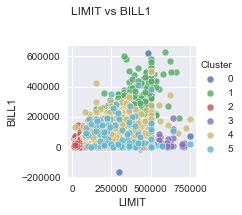

In [135]:
import seaborn as sns
f=sns.FacetGrid(defaulters_num, hue='Cluster') 
f.map(sns.scatterplot,'LIMIT','BILL1',alpha=0.8)
f.add_legend()
f.fig.subplots_adjust(top=0.8) 
f.fig.suptitle('LIMIT vs BILL1')
plt.show()

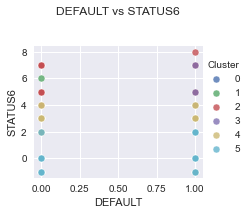

In [136]:
import seaborn as sns
f=sns.FacetGrid(defaulters_num, hue='Cluster') 
f.map(sns.scatterplot,'DEFAULT','STATUS6',alpha=0.8)
f.add_legend()
f.fig.subplots_adjust(top=0.8) 
f.fig.suptitle('DEFAULT vs STATUS6')
plt.show()

In [137]:
K = range(1, 10) #(start, end excluding)
list(K)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [138]:
scaled_defaulters.shape

(9993, 13)

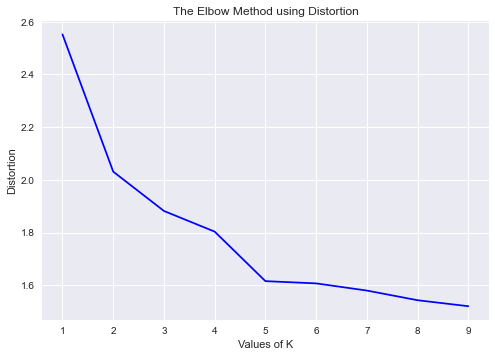

In [139]:
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
inertias = []
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeansModel = KMeans(n_clusters=k).fit(scaled_defaulters)
    #kmeansModel.fit(scaled_defaulters)
 
    distortions.append(sum(np.min(cdist(scaled_defaulters, kmeansModel.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_defaulters.shape[0])
    inertias.append(kmeansModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

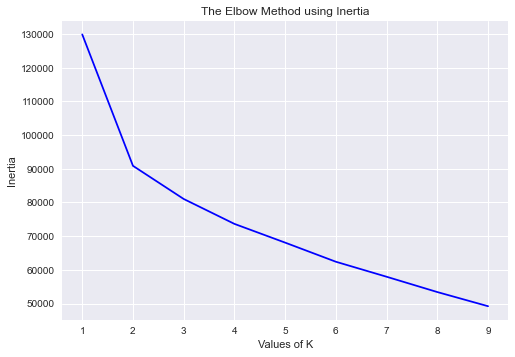

In [140]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# <font color= maroon> Recommendations & Conclusion

##### Insights

 - High school bank clients are more likely to default on their payments based on their educational level. In terms of marital status, bank clients who are single are more prone to default on their payments.
 
- Clients who have not paid on time based on their payment status are more likely to default. In addition, their bill amount for the previous six months is usually larger than their payment.

##### Recommendations

- Client payment status must be constantly checked to reduce the risk of default but we must be especially cautious on high school and single bank clients.


- Aside from payment status, bank clients who have missed payments should have their credit limit lowered, as the bill amount is likely to be large if the credit limit is high which results in clients having difficulty to make payment.

# <font color= maroon> References

https://seaborn.pydata.org/examples/index.html

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

https://seaborn.pydata.org/tutorial/categorical.html

https://seaborn.pydata.org/tutorial/relational.html

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/